In [12]:
# III. CNN for classification with Keras
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
import matplotlib.pylab as pylab
import numpy as np


In [13]:
# Import and load MNIST data
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, X_test.shape)  # Output: (60000, 28, 28) (10000, 28, 28)


(60000, 28, 28) (10000, 28, 28)


In [14]:
# Reshape to [samples][pixels][width][height] and normalize
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255


In [15]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]  # Number of categories



In [16]:
# Define the CNN model
def convolutional_model():
    model = Sequential()
    model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model



In [17]:
# Build and summarize the model
model = convolutional_model()
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │       921,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 924,374 (3.53 MB)

 Trainable params: 924,374 (3.53 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)


In [ ]:
# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {:.2f}% \nError: {:.2f}%".format(scores[1] * 100, 100 - scores[1] * 100))


In [ ]:
from keras.models import Model

# Gọi mô hình trước khi trích xuất lớp trung gian
_ = model.predict(X_train[:1])

# Xác định lớp convolutional cần lấy đầu ra
conv_layer = model.get_layer(index=0)  # Lấy lớp đầu tiên (Conv2D)

# Tạo mô hình trung gian với đầu vào từ mô hình chính
intermediate_layer_model = Model(inputs=model.input, outputs=conv_layer.output)

# Dự đoán đầu ra của lớp trung gian
intermediate_output = intermediate_layer_model.predict(X_train[:1])

print("Model Input Shape:", model.input.shape)
print("Intermediate Output Shape:", intermediate_output.shape)


In [ ]:
# Visualize 64 filters từ lớp Conv2D
import matplotlib.pylab as pylab

fig = pylab.figure(figsize=(15, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
pylab.gray()

for c in range(64):
    pylab.subplot(8, 8, c + 1)
    pylab.imshow(intermediate_output[0, :, :, c], cmap='gray')
    pylab.axis('off')

pylab.show()


In [ ]:
# Visualize 64 filters from the first convolutional layer
fig = pylab.figure(figsize=(15, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
pylab.gray()

for c in range(64):
    pylab.subplot(8, 8, c + 1)
    pylab.imshow(intermediate_output[0, :, :, c], cmap='gray')
    pylab.axis('off')

pylab.show()


Classification with dense FC layers with Keras

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import to_categorical
# import data
from keras.datasets import mnist
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, X_test.shape)
# (60000, 28, 28) (10000, 28, 28)
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
X_train = X_train / 255 # normalize training data
X_test = X_test / 255 # normalize test data
y_train = to_categorical(y_train) # to one-hot-encoding of the labels
y_test = to_categorical(y_test)
num_classes = y_test.shape[1] # number of categories
def FC_model():
    # create model
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.15))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    return model
# build the model
model = FC_model()
model.summary()
# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10,
batch_size=200, verbose=2)
# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

(60000, 28, 28) (10000, 28, 28)


/home/rb124/workspace/personal/XLA-classwork/venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-11-29 13:25:27.038060: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 199,210 (778.16 KB)

 Trainable params: 199,210 (778.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


2024-11-29 13:25:27.272049: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


300/300 - 2s - 7ms/step - accuracy: 0.8995 - loss: 0.3488 - val_accuracy: 0.9586 - val_loss: 0.1413
Epoch 2/10
300/300 - 1s - 3ms/step - accuracy: 0.9589 - loss: 0.1384 - val_accuracy: 0.9686 - val_loss: 0.1025
Epoch 3/10
300/300 - 1s - 4ms/step - accuracy: 0.9703 - loss: 0.0974 - val_accuracy: 0.9721 - val_loss: 0.0882
Epoch 4/10
300/300 - 1s - 3ms/step - accuracy: 0.9769 - loss: 0.0745 - val_accuracy: 0.9767 - val_loss: 0.0732
Epoch 5/10
300/300 - 1s - 3ms/step - accuracy: 0.9808 - loss: 0.0606 - val_accuracy: 0.9791 - val_loss: 0.0664
Epoch 6/10
300/300 - 1s - 3ms/step - accuracy: 0.9837 - loss: 0.0503 - val_accuracy: 0.9801 - val_loss: 0.0664
Epoch 7/10
300/300 - 1s - 3ms/step - accuracy: 0.9858 - loss: 0.0426 - val_accuracy: 0.9817 - val_loss: 0.0610
Epoch 8/10
300/300 - 1s - 3ms/step - accuracy: 0.9885 - loss: 0.0366 - val_accuracy: 0.9779 - val_loss: 0.0674
Epoch 9/10
300/300 - 1s - 3ms/step - accuracy: 0.9893 - loss: 0.0320 - val_accuracy: 0.9814 - val_loss: 0.0639
Epoch 10/10


In [4]:
from keras.models import Model
import matplotlib.pylab as pylab
import numpy as np

# Lấy trọng số từ lớp Dense
W = model.get_layer('dense_1').get_weights()
weights = W[0]  # Ma trận trọng số
bias = W[1]     # Bias

print(weights.shape)  # In hình dạng trọng số
print(bias.shape)     # In hình dạng bias

# Số lượng đơn vị đầu vào và đầu ra của lớp
input_dim, hidden_units = weights.shape

fig = pylab.figure(figsize=(20, 20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.95, hspace=0.05, wspace=0.05)
pylab.gray()

for i in range(min(hidden_units, 200)):  # Giới hạn 200 trọng số
    reshaped_weight = np.reshape(weights[:, i], (28, 28))
    pylab.subplot(15, 14, i + 1)
    pylab.imshow(reshaped_weight), pylab.axis('off')

pylab.suptitle('Dense_1 Weights (200 hidden units)', size=20)
pylab.show()


(200, 200)
(200,)


ValueError: cannot reshape array of size 200 into shape (28,28)

<Figure size 2000x2000 with 0 Axes>

Training set: (50000, 784)
Validation set: (10000, 784)
Test set: (10000, 784)
Epoch 1/10


/home/rb124/workspace/personal/XLA-classwork/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-29 13:38:45.785231: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 156800000 exceeds 10% of free system memory.


196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4711 - loss: 1.9238 - val_accuracy: 0.8028 - val_loss: 1.1035
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8191 - loss: 0.9880 - val_accuracy: 0.8469 - val_loss: 0.7410
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8522 - loss: 0.6997 - val_accuracy: 0.8642 - val_loss: 0.5982
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8671 - loss: 0.5783 - val_accuracy: 0.8769 - val_loss: 0.5224
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8765 - loss: 0.5109 - val_accuracy: 0.8831 - val_loss: 0.4759
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8868 - loss: 0.4612 - val_accuracy: 0.8880 - val_loss: 0.4427
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8892 - loss: 0.4340 - val_accuracy: 0.8914 - val_loss: 0.4190
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8923 - loss: 0.4135 - val_accuracy: 0.8957 - val_

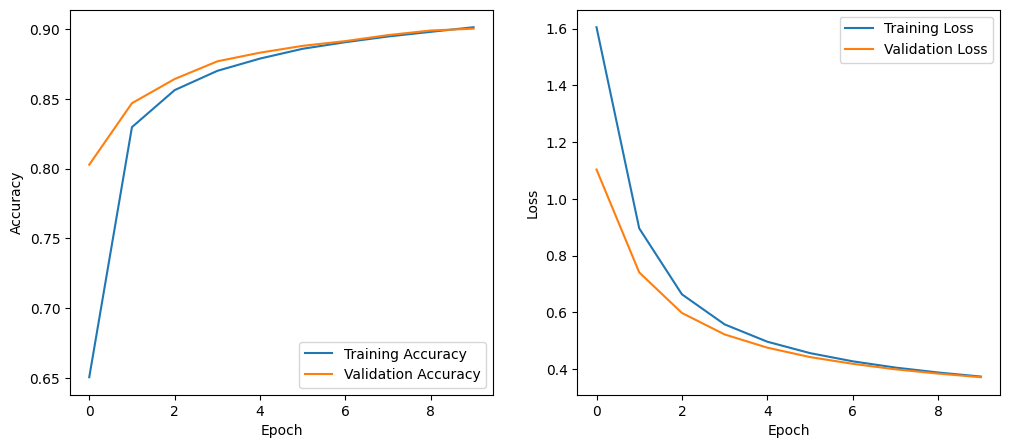

In [6]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and preprocess data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize and reshape data
X_train = X_train.reshape((-1, 28 * 28)).astype(np.float32) / 255.0
X_test = X_test.reshape((-1, 28 * 28)).astype(np.float32) / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Split validation set
np.random.seed(0)
train_indices = np.random.choice(X_train.shape[0], 50000, replace=False)
valid_indices = [i for i in range(X_train.shape[0]) if i not in train_indices]
X_valid, y_valid = X_train[valid_indices], y_train[valid_indices]
X_train, y_train = X_train[train_indices], y_train[train_indices]

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_valid.shape}")
print(f"Test set: {X_test.shape}")

# Model creation
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu', input_shape=(28 * 28,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.008),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=256,
    validation_data=(X_valid, y_valid)
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
